<a href="https://colab.research.google.com/github/Claudia1202/PMP-2023/blob/main/Lab03/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.9418 |
+------+----------+
| A(1) |   0.0582 |
+------+----------+


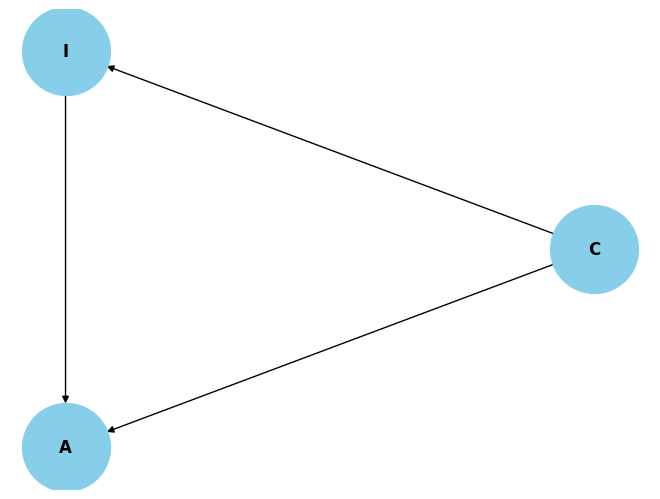

0.6740911162792246


In [5]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx

model = BayesianNetwork([('C', 'I'), ('C', 'A'), ('I', 'A')])

cpd_cutremur = TabularCPD(variable='C', variable_card=2, values=[[0.9995], [0.0005]])
cpd_incendiu = TabularCPD(variable='I', variable_card=2, values=[[0.01, 0.03], [0.99, 0.97]], evidence=['C'], evidence_card=[2])
cpd_alarma = TabularCPD(variable='A', variable_card=2, values=[[0.98, 0.02, 0.03, 0.97], [0.02, 0.98, 0.97, 0.03]], evidence=['C', 'I'], evidence_card=[2, 2])

model.add_cpds(cpd_cutremur, cpd_incendiu, cpd_alarma)

assert model.check_model()

infer = VariableElimination(model)
result = infer.query(variables=['A'], evidence={'C': 1})
print(result)

#desen
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='skyblue')
plt.show()

# 3.
inference = VariableElimination(model)
result = inference.query(variables=['I'], evidence={'A': 0})
prob_incendiu_fara_alarma = result.values[1]
print( prob_incendiu_fara_alarma)


In [ ]:
pip install pgmpy